# 🧩 Notebook 03: Generalized Linear Models (GLMs)

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-level imports
from utils.visual_utils import save_and_show_plot
from utils.model_utils import summarize_model_coefficients
from utils.diagnostics import plot_fitted_vs_actual, plot_residuals

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants and Load Data

DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/03_generalized_linear_models")
EXPORT_TABLES = Path("../exports/tables/03_generalized_linear_models")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

# Load Poisson and Logistic datasets
df_pois = pd.read_csv(DATA_PATH / "glm_poisson.csv")
df_logit = pd.read_csv(DATA_PATH / "glm_logistic.csv")

df_pois.head(), df_logit.head()

(          X   y
 0  2.756989  25
 1  1.077835   0
 2  2.869606  19
 3  3.355638  29
 4  2.413435  15,
           X  y
 0 -0.135254  1
 1  1.003567  1
 2  2.333244  0
 3  0.192283  0
 4  1.957064  1)

## 🔷 Part 1: Poisson Regression

In [3]:
# Fit GLM Poisson
model_pois = smf.glm("y ~ X", data=df_pois, family=sm.families.Poisson()).fit()
print(model_pois.summary())

# Export summary
with open(EXPORT_TABLES / "poisson_model_summary.txt", "w") as f:
    f.write(model_pois.summary().as_text())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      298
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -775.46
Date:                Sat, 26 Jul 2025   Deviance:                       318.82
Time:                        23:24:26   Pearson chi2:                     305.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4608      0.046      9.922      0.0

In [4]:
#  Poisson Coefficients Table
pois_summary_df = summarize_model_coefficients(model_pois)
display(pois_summary_df)

# Export
pois_summary_df.to_csv(EXPORT_TABLES / "poisson_coefficients.csv")

,coef,p_value,ci_lower,ci_upper
Intercept,0.460762,3.355464e-23,0.369740,0.551784
X,0.909724,0.000000e+00,0.880829,0.938619


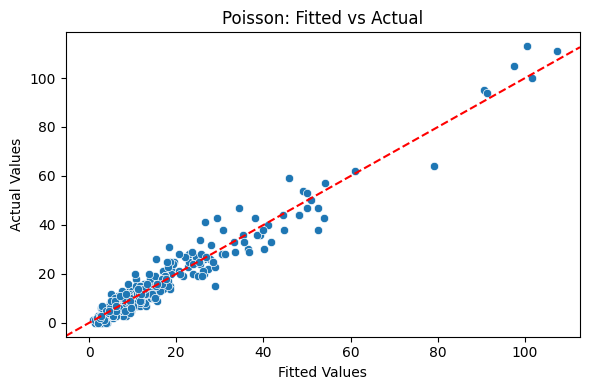

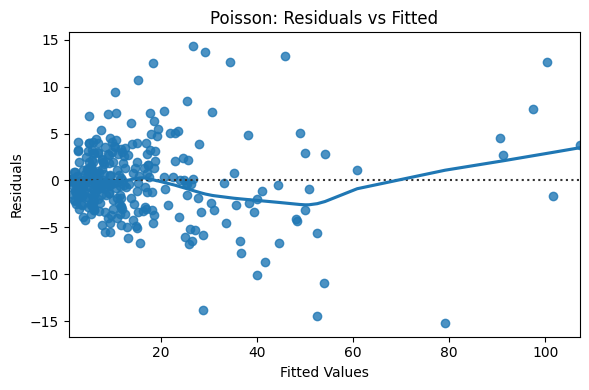

In [5]:
# Poisson Fitted vs Actual and Residuals

# Fitted vs Actual
plot_fitted_vs_actual(df_pois["y"], model_pois.fittedvalues, title="Poisson: Fitted vs Actual")
save_and_show_plot("poisson_fitted_vs_actual", EXPORT_PLOTS);

# Residuals vs Fitted
plot_residuals(model_pois, title="Poisson: Residuals vs Fitted")
save_and_show_plot("poisson_residuals", EXPORT_PLOTS);

## 🔶 Part 2: Logistic Regression

In [6]:
# Fit GLM Logistic (Binomial)
model_logit = smf.glm("y ~ X", data=df_logit, family=sm.families.Binomial()).fit()
print(model_logit.summary())

# Export summary
with open(EXPORT_TABLES / "logistic_model_summary.txt", "w") as f:
    f.write(model_logit.summary().as_text())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      298
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.08
Date:                Sat, 26 Jul 2025   Deviance:                       360.17
Time:                        23:24:27   Pearson chi2:                     298.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1226
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4919      0.128     -3.856      0.0

In [7]:
# Logistic Coefficients Table

logit_summary_df = summarize_model_coefficients(model_logit)
display(logit_summary_df)

# Export
logit_summary_df.to_csv(EXPORT_TABLES / "logistic_coefficients.csv")

,coef,p_value,ci_lower,ci_upper
Intercept,-0.491883,1.152322e-04,-0.741899,-0.241868
X,0.861724,1.370681e-08,0.564217,1.159230


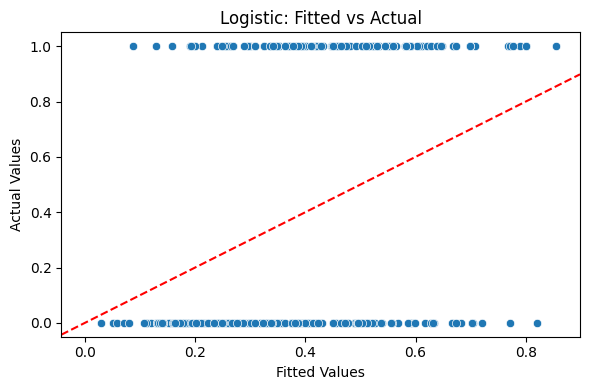

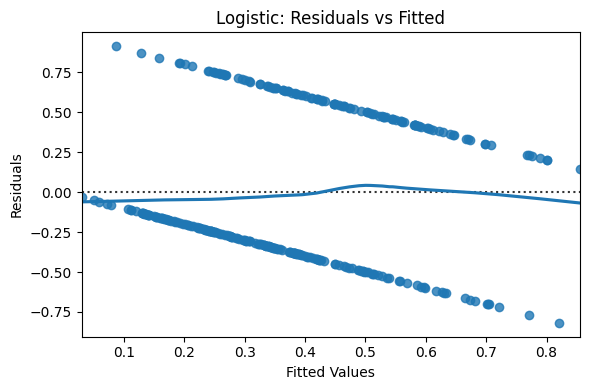

In [8]:
# Fitted vs Actual
plot_fitted_vs_actual(df_logit["y"], model_logit.fittedvalues, title="Logistic: Fitted vs Actual")
save_and_show_plot("logistic_fitted_vs_actual", EXPORT_PLOTS);

# Residuals
plot_residuals(model_logit, title="Logistic: Residuals vs Fitted")
save_and_show_plot("logistic_residuals", EXPORT_PLOTS);

## 📌 Takeaways

- Both Poisson and Logistic models were successfully fitted using GLM from `statsmodels`
- Coefficients were interpretable with significant p-values
- Residual patterns are appropriate for generalized models
- These models form the basis for handling count and classification data in statistical learning

## ✅ Summary:

- Loaded synthetic datasets for Poisson and Logistic regression (`glm_poisson.csv`, `glm_logistic.csv`)
- Fitted GLM models using `statsmodels.formula.api.glm()` with appropriate families (Poisson and Binomial)
- Interpreted coefficients, confidence intervals, and p-values
- Visualized fitted vs actuals and residuals for both models
- Exported all model tables and plots for comparison